In [0]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
# %matplotlib inline

In [5]:
df= pd.read_excel('EcommerceCustomers.csv.xlsx')
df.head()

,Email,Address,Avatar,Avg. Session Length,Time on App,Time on Website,Length of Membership,Yearly Amount Spent
0,mstephenson@fernandez.com,"835 Frank Tunnel\nWrightmouth, MI 82180-9605",Violet,34.497268,12.655651,39.577668,4.082621,587.951054
1,hduke@hotmail.com,"4547 Archer Common\nDiazchester, CA 06566-8576",DarkGreen,31.926272,11.109461,37.268959,2.664034,392.204933
2,pallen@yahoo.com,"24645 Valerie Unions Suite 582\nCobbborough, D...",Bisque,33.000915,11.330278,37.110597,4.104543,487.547505
3,riverarebecca@gmail.com,"1414 David Throughway\nPort Jason, OH 22070-1220",SaddleBrown,34.305557,13.717514,36.721283,3.120179,581.852344
4,mstephens@davidson-herman.com,"14023 Rodriguez Passage\nPort Jacobville, PR 3...",MediumAquaMarine,33.330673,12.795189,37.536653,4.446308,599.406092


In [6]:
df.columns

Index(['Email', 'Address', 'Avatar', 'Avg. Session Length', 'Time on App',
       'Time on Website', 'Length of Membership', 'Yearly Amount Spent'],
      dtype='object')

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 8 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Email                 500 non-null    object 
 1   Address               500 non-null    object 
 2   Avatar                500 non-null    object 
 3   Avg. Session Length   500 non-null    float64
 4   Time on App           500 non-null    float64
 5   Time on Website       500 non-null    float64
 6   Length of Membership  500 non-null    float64
 7   Yearly Amount Spent   500 non-null    float64
dtypes: float64(5), object(3)
memory usage: 31.4+ KB


In [0]:
sns.set_palette('GnBu_d')
sns.set_style('whitegrid')

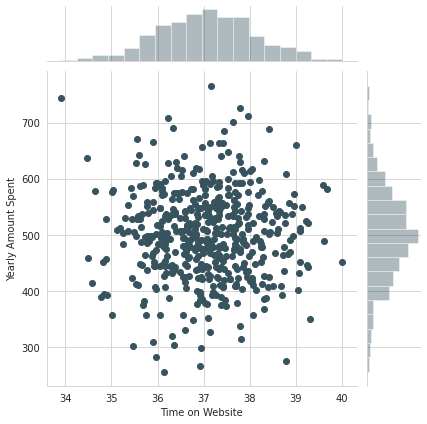

In [9]:
sns.jointplot(x='Time on Website', y = 'Yearly Amount Spent', data=df)

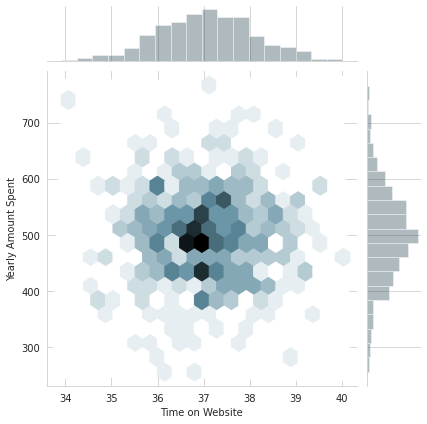

In [10]:
sns.jointplot(x='Time on Website', y = 'Yearly Amount Spent', data=df, kind='hex')

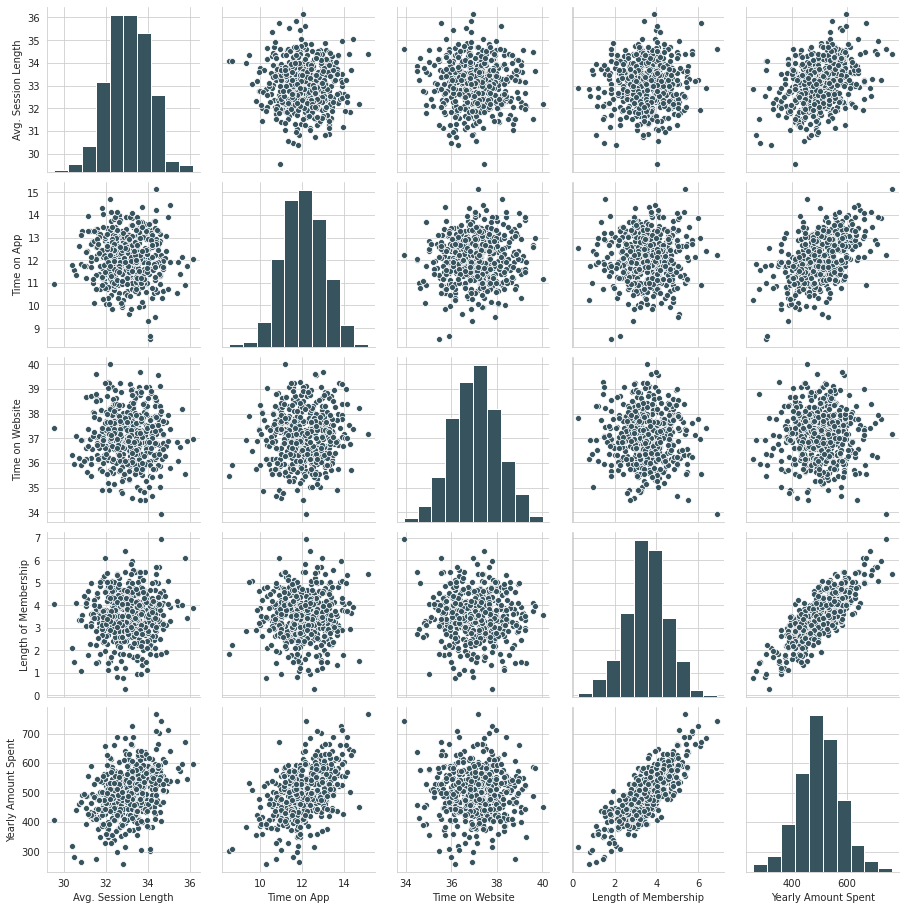

In [11]:
sns.pairplot(df)

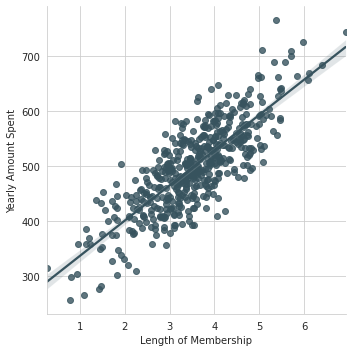

In [12]:
sns.lmplot(x = 'Length of Membership', y= 'Yearly Amount Spent', data=df)

In [0]:
y = df['Yearly Amount Spent']
x = df[['Avg. Session Length', 'Time on App',
       'Time on Website', 'Length of Membership']]

In [0]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x,y)

In [0]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression()

In [16]:
lr.fit(x_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [17]:
predictions = lr.predict(x_test)
predictions

array([497.95128506, 602.7370581 , 648.45453305, 498.43092954,
       562.76330853, 380.94431418, 498.8097239 , 486.28482452,
       583.87037645, 563.77720494, 384.12641443, 512.71686351,
       507.69142014, 425.40261295, 529.63105325, 570.31664985,
       373.50912603, 422.66671919, 511.63981792, 548.54715622,
       478.96483357, 395.40536268, 616.23176573, 513.69275097,
       435.1758153 , 536.16974941, 397.5236511 , 545.32485853,
       460.90603675, 395.96721468, 519.3308582 , 467.54535655,
       634.14115141, 343.0066516 , 619.72763719, 452.25304435,
       456.2539101 , 424.08688095, 552.72048924, 676.96106878,
       441.02500361, 475.24689849, 459.02348271, 425.30295911,
       502.51307664, 575.17230246, 684.26201842, 470.70146326,
       553.18663053, 427.46911612, 572.58957602, 397.09162992,
       532.29662807, 559.2696506 , 509.78520363, 399.09562309,
       534.57174403, 638.69201897, 562.84867916, 395.01046227,
       520.15359907, 549.23184081, 376.11100802, 445.98

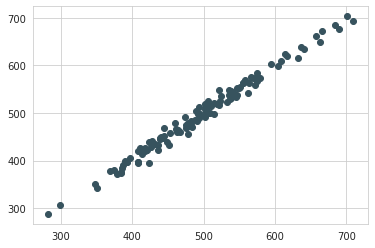

In [18]:
plt.scatter(y_test, predictions)

In [0]:
from sklearn import metrics

In [20]:
print(metrics.mean_squared_error(y_test, predictions))
print(metrics.mean_absolute_error(y_test, predictions))
print(np.sqrt(metrics.mean_squared_error(y_test, predictions)))

96.80870573790844
7.969623760221735
9.839141514273917


In [21]:
# 결정계수 
lr.score(x_test, y_test)

0.986034013341333

In [22]:
# 결정계수 (r**2)
metrics.r2_score(y_test, predictions)

0.986034013341333

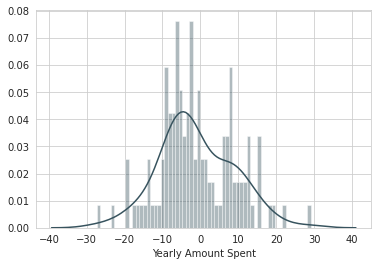

In [23]:
sns.distplot(y_test - predictions, bins=60)

In [24]:
lr.coef_

array([25.99668733, 39.0160611 ,  0.49433056, 61.28831743])

In [25]:
lr.intercept_

-1064.8168038136278

In [26]:
pd.DataFrame({'Coef_':lr.coef_}, index=x.columns)

,Coef_
Avg. Session Length,25.996687
Time on App,39.016061
Time on Website,0.494331
Length of Membership,61.288317
